# Analise Exploratória de Dados
## SIAD 2022/1
#### Grupo 4
   - Dan Samuel
   - Matheus Diniz Alencar
   - Cardeque Henrique
   - Talles Eduardo


----
# Introdução
- Abordagem utilizada para analisar e investigar um conjunto de dados a fim de resumir suas principais características.
- Análise Descritiva dos dados (descrever e resumir)
- Geralmente utiliza métodos de visualização de dados - gráficos, por exemplo

<br>

- Permite determinar a melhor forma de controlar os dados
- Facilita a descoberta de padrões e anomalias, além de ajudar na testabilidade de hipóteses ou verificar suposições
- Traz uma melhor compreensão sobre as variáveis

## Ferramentas de auxílio para EDA
- Python (pandas, matplotlib)
- Linguagem R

## Tipos de Análise Exploratória de Dados:
- Univariada
- Multivariada

----
#### Importações
- Bibliotecas python que devem ser utilizadas e importadas

In [19]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so


#### Trasformando o csv em um DataFrame
   - Após baixar os dados do [Kaggle](https://www.kaggle.com/datasets/shariful07/student-mental-health/versions/1?resource=download)
   - Eles foram importados usando o pandas e adicionados a variavel `df_mh`
   - Renomeado os campos para facilitar a implementação

In [20]:
df_mh = pd.read_csv("sm_health.csv")

dict = {'Choose your gender': 'Genero',
        'What is your course?': 'Curso',
        'Your current year of Study' : 'Ano do Curso',
        'What is your CGPA?' : 'CGPA',
        'Do you have Depression?' : 'Depressao',
        'Do you have Anxiety?' : 'Ansiedade',
        'Do you have Panic attack?' : 'Ataque de panico',
        'Did you seek any specialist for a treatment?' : 'Tratamento'
        }

df_mh.rename(columns = dict, inplace = True)
df_mh = df_mh.drop(['Timestamp'], axis = 1)
df_mh.replace({'Year 1':'year 1','Year 2': 'year 2', 'Year 3': 'year 3'}, inplace=True)

df_mh.head()

,Genero,Age,Curso,Ano do Curso,CGPA,Marital status,Depressao,Ansiedade,Ataque de panico,Tratamento
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


----
# Análise Univariada
- Análise mais simples
- Considera somente uma variável
- Não considera condições, relacionamentos, causas e efeitos…
- Visa analisar uma única variável para descrever aquela variável e encontrar padrões dentro dela mesma

- Classificar a variável quanto a seu tipo:
    - Qualitativa (nominal ou ordinal) ou quantitativa (discreta ou contínua)
    - Obter tabelas, gráficos e/ou medidas que resumem a variável

##### Ferramentas de auxílio:
   -   Histogramas;
   -   Tabelas Cruzadas;
   -   Diagramas de Caixa;



----
## Exemplos de Análise Univariada
- Quantida de homens e mulheres da pesquisa
- Quantida de pessoas por ano do Curso

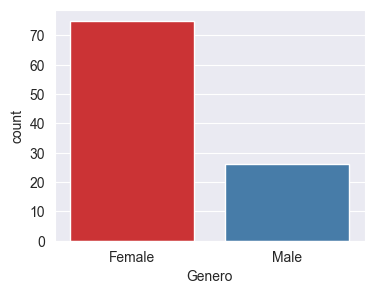

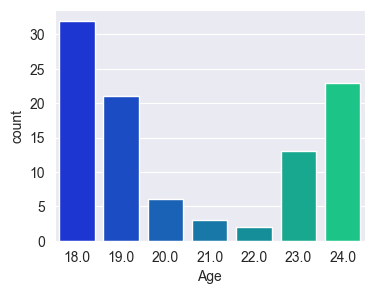

In [21]:
fig, ax = plt.subplots(figsize=(4,3))
sns.countplot(x='Genero', data = df_mh, palette="Set1")
plt.show()

fig, ax = plt.subplots(figsize=(4,3))
sns.countplot(x = 'Age', data = df_mh, palette="winter")
plt.show()

----
## Análise Multivariada
- Análise mais complexa

- Considera duas ou mais variáveis dependentes

- Busca encontrar padrões, relacionamentos, causa e efeito
   - Clima — localização geográfica, umidade, poluição, etc.

- Traz uma visão sistêmica sobre o modelo e a base de dados

- Sintetiza o funcionamento do modelo

- Prós:
   - Traz resultados mais compatíveis com a realidade
   - O processo é descritivo, trazendo resultados verdadeiros e exatos

- Contras:
   - Processo demorado
   - Procedimentos e cálculos geralmente são complexos

##### Ferramentas de auxílio:
- Tabelas Cruzadas
- Análise de Regressão Logística
- Análise Discriminatória
- Análise Multivariada de Variância (MANOVA)
- Análise de Cluster
- Escala Multidimensional (MDS)



#### Separando as colunas numéricas das colunas categoricas
- Colunas categorica sendo colocadas na variavel categ
- Colunas numéricas sendo colocacas na variavel num

In [22]:
categ = df_mh.select_dtypes(include = 'object')
num = df_mh.select_dtypes(exclude = 'object')

#### Tabelas Cruzadas

In [23]:
categ.describe().head(10)

,Genero,Curso,Ano do Curso,CGPA,Marital status,Depressao,Ansiedade,Ataque de panico,Tratamento
count,101,101,101,101,101,101,101,101,101
unique,2,49,4,6,2,2,2,2,2
top,Female,BCS,year 1,3.50 - 4.00,No,No,No,No,No
freq,75,18,43,47,85,66,67,68,95


### Matrix de confusão da correlação das colunas da tabela

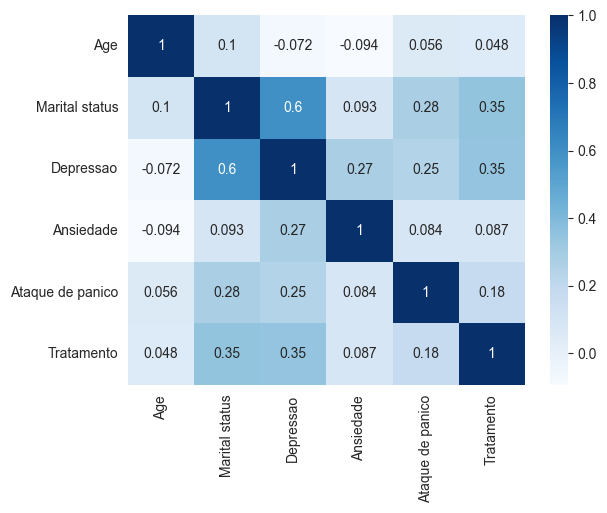

In [24]:
matrix_df = df_mh.replace(('Yes','No'),(1,0),inplace=False)
sns.heatmap(matrix_df.corr(),annot=True, cmap="Blues")#,vmin=-1,vmax=1)
plt.show()

Text(0.5, 1.0, 'Distribuição de Ansiedade por Idade e Genero')

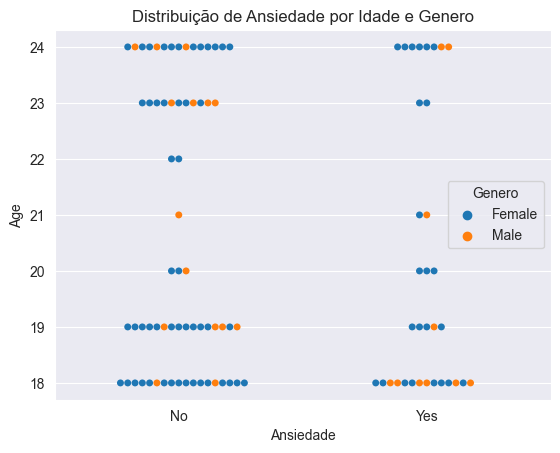

In [25]:
sns.swarmplot(x='Ansiedade', y='Age', data=df_mh,hue='Genero')
plt.title("Distribuição de Ansiedade por Idade e Genero")

----
# Conceitos Estatísticos
- Média
- Moda
- Mediana
- Desvio Padrão
- Intervalo de Confiança

### Média
- Soma de todos os valores de um conjunto de dados e dividindo-se pelo número de elementos deste conjunto

In [26]:
idades = num['Age']

print(idades.to_list())
idades.describe()

[18.0, 21.0, 19.0, 22.0, 23.0, 19.0, 23.0, 18.0, 19.0, 18.0, 20.0, 24.0, 18.0, 19.0, 18.0, 24.0, 24.0, 24.0, 20.0, 18.0, 19.0, 18.0, 24.0, 24.0, 23.0, 18.0, 19.0, 18.0, 24.0, 24.0, 23.0, 18.0, 19.0, 18.0, 19.0, 18.0, 18.0, 19.0, 18.0, 24.0, 24.0, 22.0, 20.0, nan, 23.0, 18.0, 19.0, 18.0, 24.0, 24.0, 23.0, 18.0, 19.0, 20.0, 19.0, 21.0, 23.0, 20.0, 18.0, 23.0, 18.0, 19.0, 18.0, 24.0, 24.0, 23.0, 18.0, 19.0, 18.0, 24.0, 24.0, 18.0, 19.0, 18.0, 24.0, 24.0, 23.0, 18.0, 19.0, 18.0, 24.0, 24.0, 19.0, 19.0, 23.0, 18.0, 19.0, 18.0, 24.0, 24.0, 23.0, 18.0, 19.0, 18.0, 24.0, 18.0, 21.0, 18.0, 19.0, 23.0, 20.0]


count    100.00000
mean      20.53000
std        2.49628
min       18.00000
25%       18.00000
50%       19.00000
75%       23.00000
max       24.00000
Name: Age, dtype: float64

In [27]:
print('---- Média ----')
n_idades = pd.concat([idades, pd.Series([150])])
n_idades.mean()

---- Média ----


21.81188118811881

### Mediana
- Valor central de um conjunto de dados
- Para cálculo da mediana, é necessário que o conjunto de dados esteja em ordem crescente
- É o valor que divide o conjunto de dados ao meio, deixando os 50% menores valores de um lado e os 50% maiores valores do outro lado.


In [28]:
print('---- Mediana ----')
idades.median()

---- Mediana ----


19.0

### Moda
- É o elemento mais frequente do conjunto, o que mais se repete, o que tem maior frequência absoluta
- Pode haver mais de uma moda!

In [29]:
print('---- Moda ----')
df_mh[['Genero', 'Age', 'Curso', 'Ano do Curso', 'CGPA']].mode()

---- Moda ----


,Genero,Age,Curso,Ano do Curso,CGPA
0,Female,18.0,BCS,year 1,3.50 - 4.00


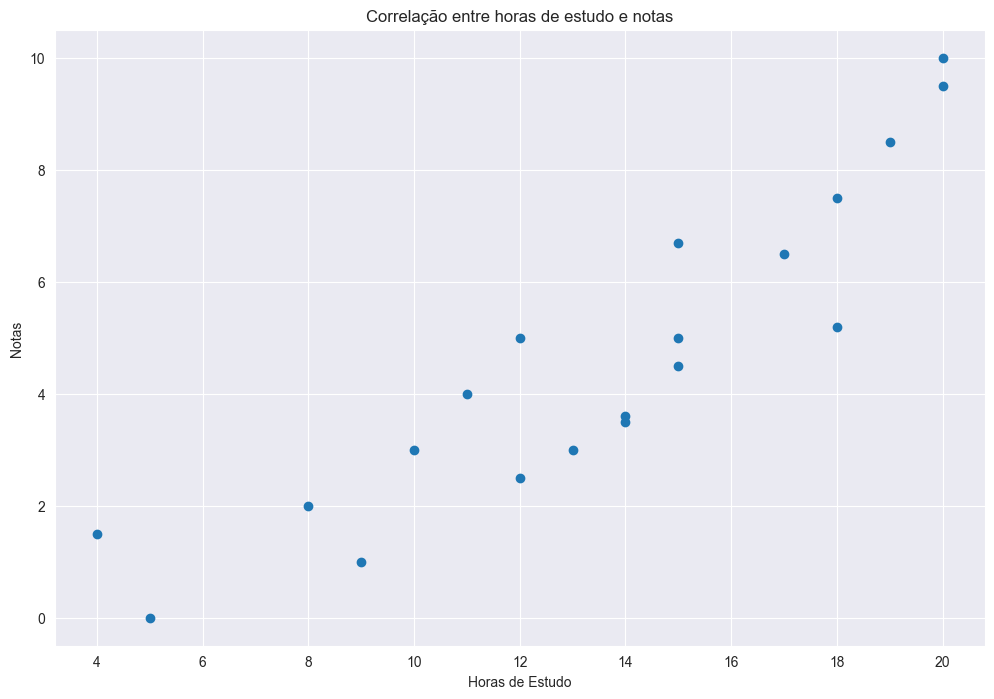

In [30]:
horasEstudo=[20,12,14,15,18,9,5,4,8,13,14,15,19,18,12,11,10,15,17,20]
Notas=[9.5,2.5,3.6,6.7,5.2,1,0,1.5,2,3,3.5,4.5,8.5,7.5,5,4,3,5,6.5,10]

plt.figure(figsize=(12, 8))
plt.title('Correlação entre horas de estudo e notas')
plt.xlabel('Horas de Estudo')
plt.ylabel('Notas')

plt.scatter(horasEstudo, Notas)
plt.show()